## Этап 1: Знакомство с данными и предобработка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calls_data = pd.read_csv('/Users/alekseyfedko/Desktop/Project/calls.csv')
internet_data = pd.read_csv('/Users/alekseyfedko/Desktop/Project/internet.csv')
messages_data = pd.read_csv('/Users/alekseyfedko/Desktop/Project/messages.csv')
tariffs_data = pd.read_csv('/Users/alekseyfedko/Desktop/Project/tariffs.csv')
users_data = pd.read_csv('/Users/alekseyfedko/Desktop/Project/users.csv')


calls_data['duration'] = np.ceil(calls_data['duration'])
calls_data['duration'] = calls_data['duration'].astype('int')
calls_data['duration'] = calls_data['duration'].replace(0, np.nan)

calls_data = calls_data.dropna().reset_index(drop = True)
calls_data['id'] = calls_data['id'].astype('int') 
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'],format='%Y.%m.%d')
len(calls_data[calls_data['duration'] == 0])

calls_data.head()



,id,call_date,duration,user_id
0,10002,2018-06-11,3.0,1000
1,10003,2018-09-21,14.0,1000
2,10004,2018-12-15,6.0,1000
3,10007,2018-08-22,19.0,1000
4,10008,2018-09-15,19.0,1000


#### **Предобработка calls_data:** <br>
<br>
Просмотрел общую информацию о таблице <br>
Посмотрел срез, где продолжительность равна нулю<br>
Привёл столбец id к int<br>
Округлил минуты в большую сторону и привёл к int<br>
Привёл duration к формату даты<br>

Проблематика данных в том, что в столбце duration встречается 39613 нулевых значения. <br>
Принял решение их удалить, поскольку они могут повлиять на показатель количества звонков, при этом эти звонки не влияют на оценку прибыли.


In [2]:
internet_data = internet_data.drop('Unnamed: 0', axis=1)

internet_data['id'] = internet_data['id'].astype('int')
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
internet_data['mb_used'] = internet_data['mb_used'].astype('int') 
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'],format='%Y.%m.%d')
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int64         
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.6 MB


### **Предобработка internet_data:** <br>
<br>
Просмотрел общую информацию о таблице <br>
Привёл столбец id, mb_used к int<br>
Привёл session_date к формату даты<br>

In [3]:
messages_data['id'] = messages_data['id'].astype('int')
messages_data['user_id'] = messages_data['user_id'].astype('int')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'],format='%Y.%m.%d')
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


### **Предобработка messages_data:** <br>
<br>
Просмотрел общую информацию о таблице <br>
Привёл столбец id, user_id к int<br>
Привёл message_date к формату даты<br>

In [4]:
tariffs_data.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'],format='%Y.%m.%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'],format='%Y.%m.%d')

users_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### **Предобработка users_data:** <br>
Просмотрел общую информацию о таблице <br>
Привёл churn_date, reg_date к формату даты<br>
В выборке есть 38 выбывших пользователя

## Этап 2: Подготовка таблиц

In [6]:
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month
montly_calls = calls_data.groupby(['user_id','month']).agg(['count', 'sum'])
montly_calls.columns = ['count', 'delete1', 'delet2', 'durations_sum']
montly_calls = montly_calls.drop(['delete1', 'delet2'], axis=1)
montly_calls = montly_calls.reset_index() #таблица разговоров по месяцам


messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month
montly_messages = messages_data.groupby(['user_id','month']).count()
montly_messages.columns = ['messages_count', 'delete']
montly_messages = montly_messages.drop(['delete'], axis=1)
montly_messages = montly_messages.reset_index() #таблица сообщений по месяцам


internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
montly_internet = internet_data.groupby(['user_id','month']).agg(['count', 'sum'])
montly_internet.columns = ['delete1', 'delete2', 'delete3', 'mb_sum']
montly_internet = montly_internet.drop(['delete1', 'delete2', 'delete3'], axis=1)
montly_internet = montly_internet.reset_index() #таблица интернета по месяцам

tariff_dict = users_data[['user_id', 'tariff']]
tariff_dict


common_montly = montly_calls.merge(tariff_dict, on='user_id', how='left')

def excess_min (data):
    smart_min = 500
    ultra_min = 3000
    if data['tariff'] == 'smart':
        result_smart = data['durations_sum'] - smart_min
        if result_smart <= 0:
            return 0
        else:
            return result_smart
    else:
        result_ultra = data['durations_sum'] - ultra_min
        if result_ultra <= 0:
            return 0
        else:
            return result_ultra

common_montly['excess_min'] = common_montly.apply(excess_min, axis = 1)

def additinal_payment_per_min (data):
    smart_cost = 3
    ultra_cost = 1
    if data['tariff'] == 'smart':
        result_smart = data['excess_min'] * smart_cost
        return result_smart

    else:
        result_ultra = data['excess_min'] * ultra_cost
        return result_ultra

common_montly['add_pay'] = common_montly.apply(additinal_payment_per_min, axis = 1)

def profit_from_calls (data):
    smart_fee = 550
    ultra_fee = 1950
    if data['tariff'] == 'smart':
        return smart_fee
    else:
        return ultra_fee
    
common_montly['mountly_fee'] = common_montly.apply(profit_from_calls, axis = 1)

common_montly

montly_internet = montly_internet.merge(tariff_dict, on='user_id', how='left')



In [7]:
#задание по интернету

def excess_internet (data):
    smart_mb = 15360
    ultra_md = 30720
    if data['tariff'] == 'smart':
        result_smart = np.ceil((data['mb_sum'] - smart_mb)/1024)
        if result_smart <= 0:
            return 0
        else:
            return result_smart
    else:
        result_ultra = np.ceil((data['mb_sum'] - ultra_md)/1024)
        if result_ultra <= 0:
            return 0
        else:
            return result_ultra
        
def additinal_payment_per_gb (data):
    smart_gb_cost = 200
    ultra_gb_cost = 150
    if data['tariff'] == 'smart':
        result_smart = data['excess_gb'] * smart_gb_cost
        return result_smart

    else:
        result_ultra = data['excess_gb'] * ultra_gb_cost
        return result_ultra

    
montly_internet['excess_gb'] = montly_internet.apply(excess_internet, axis = 1)
montly_internet['add_payment_for_gb'] = montly_internet.apply(additinal_payment_per_gb, axis = 1)

montly_messages = montly_messages.merge(tariff_dict, on='user_id', how='left')
montly_internet

,user_id,month,mb_sum,tariff,excess_gb,add_payment_for_gb
0,1000,5,2256,ultra,0.0,0.0
1,1000,6,23257,ultra,0.0,0.0
2,1000,7,14016,ultra,0.0,0.0
3,1000,8,14070,ultra,0.0,0.0
4,1000,9,14581,ultra,0.0,0.0
...,...,...,...,...,...,...
3198,1498,10,20604,smart,6.0,1200.0
3199,1499,9,1848,smart,0.0,0.0
3200,1499,10,17809,smart,3.0,600.0
3201,1499,11,17984,smart,3.0,600.0


In [8]:
#работа с данными по смс

montly_messages

def excess_sms (data):
    smart_sms = 50
    ultra_sms = 1000
    if data['tariff'] == 'smart':
        result_smart = data['messages_count'] - smart_sms
        if result_smart <= 0:
            return 0
        else:
            return result_smart
    else:
        result_ultra = data['messages_count'] - ultra_sms
        if result_ultra <= 0:
            return 0
        else:
            return result_ultra

def additinal_payment_per_sms (data):
    smart_sms_cost = 3
    ultra_sms_cost = 1
    if data['tariff'] == 'smart':
        result_smart = data['excess_sms'] * smart_sms_cost
        return result_smart

    else:
        result_ultra = data['excess_sms'] * ultra_sms_cost
        return result_ultra
    

montly_messages['excess_sms'] = montly_messages.apply(excess_sms, axis = 1)
montly_messages['add_payment_for_sms'] = montly_messages.apply(additinal_payment_per_sms, axis = 1)

In [9]:
#объединение таблиц

calculated_info = common_montly.merge(montly_internet, on=['user_id','month','tariff'], how='left')
montly_messages

,user_id,month,messages_count,tariff,excess_sms,add_payment_for_sms
0,1000,5,22,ultra,0,0
1,1000,6,60,ultra,0,0
2,1000,7,75,ultra,0,0
3,1000,8,81,ultra,0,0
4,1000,9,57,ultra,0,0
...,...,...,...,...,...,...
2712,1498,10,42,smart,0,0
2713,1499,9,11,smart,0,0
2714,1499,10,48,smart,0,0
2715,1499,11,59,smart,9,27


In [10]:
calculated_data = calculated_info.merge(montly_messages, on=['user_id','month','tariff'], how='left')
calculated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              3168 non-null   int64  
 1   month                3168 non-null   int64  
 2   count                3168 non-null   int64  
 3   durations_sum        3168 non-null   float64
 4   tariff               3168 non-null   object 
 5   excess_min           3168 non-null   float64
 6   add_pay              3168 non-null   float64
 7   mountly_fee          3168 non-null   int64  
 8   mb_sum               3157 non-null   float64
 9   excess_gb            3157 non-null   float64
 10  add_payment_for_gb   3157 non-null   float64
 11  messages_count       2673 non-null   float64
 12  excess_sms           2673 non-null   float64
 13  add_payment_for_sms  2673 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 371.2+ KB


In [11]:
def result (data):
    profit = data['mountly_fee']+data['add_pay']+data['add_payment_for_sms']+data['add_payment_for_gb']
    return profit

calculated_data['revenue'] = calculated_data.apply(result, axis = 1)
calculated_data = calculated_data.fillna(0) #были пропуски в стобцах -вероятн, этими услугами не пользовались
calculated_data

,user_id,month,count,durations_sum,tariff,excess_min,add_pay,mountly_fee,mb_sum,excess_gb,add_payment_for_gb,messages_count,excess_sms,add_payment_for_sms,revenue
0,1000,5,17,159.0,ultra,0.0,0.0,1950,2256.0,0.0,0.0,22.0,0.0,0.0,1950.0
1,1000,6,28,172.0,ultra,0.0,0.0,1950,23257.0,0.0,0.0,60.0,0.0,0.0,1950.0
2,1000,7,41,340.0,ultra,0.0,0.0,1950,14016.0,0.0,0.0,75.0,0.0,0.0,1950.0
3,1000,8,42,408.0,ultra,0.0,0.0,1950,14070.0,0.0,0.0,81.0,0.0,0.0,1950.0
4,1000,9,46,466.0,ultra,0.0,0.0,1950,14581.0,0.0,0.0,57.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,1498,10,30,247.0,smart,0.0,0.0,550,20604.0,6.0,1200.0,42.0,0.0,0.0,1750.0
3164,1499,9,8,70.0,smart,0.0,0.0,550,1848.0,0.0,0.0,11.0,0.0,0.0,550.0
3165,1499,10,44,449.0,smart,0.0,0.0,550,17809.0,3.0,600.0,48.0,0.0,0.0,1150.0
3166,1499,11,62,612.0,smart,112.0,336.0,550,17984.0,3.0,600.0,59.0,9.0,27.0,1513.0


## Выводы по работе с таблицами: <br>
Все таблицы были объединены с фреймом, куда вошли id юзеров и их тариф. Так я получил дополнительную инфу в каждую таблицу, <br> которую в дальнейшем использовал для срезов. <br>
При формировании общей таблицы возникли NaN, которые я заменил на нули. В этом руководствовался логикой - NaN = не было.  <br>
В итоге получил сколько принёс каждый клиент по месяцам, согласно тем условиям, которые были в задаче. <br>


In [12]:
smart_data = calculated_data.query('tariff == "smart"')
smart_data_profit = smart_data[
    ['user_id','month','add_pay', 'mountly_fee', 'add_payment_for_gb', 'add_payment_for_sms','revenue']
].reset_index()

ultra_data = calculated_data.query('tariff == "ultra"')
ultra_data_profit = ultra_data[
    ['user_id','month','add_pay', 'mountly_fee', 'add_payment_for_gb', 'add_payment_for_sms','revenue']
].reset_index()

montly_calls_smart = common_montly.query('tariff == "smart"')
montly_calls_ultra = common_montly.query('tariff == "ultra"')
montly_calls_smart['durations_sum'].describe()
montly_calls_smart['durations_sum'].median()
montly_calls_ultra['durations_sum'].describe()
montly_calls_ultra['durations_sum'].median()

calls_variance = np.var(montly_calls_smart['durations_sum'], ddof=1)
smart_data_internet = np.var(smart_data['mb_sum'], ddof=1)
smart_data_sms = np.var(smart_data['messages_count'], ddof=1)

#ultra
ultra_data = calculated_data.query('tariff == "ultra"')
calls_variance_ultra = np.var(montly_calls_ultra['durations_sum'], ddof=1)
ultra_data_internet = np.var(ultra_data['mb_sum'], ddof=1)
ultra_data_sms = np.var(ultra_data['messages_count'], ddof=1)

mean_mb_ultra = ultra_data['mb_sum'].mean()
mean_mb_smart = smart_data['mb_sum'].mean()
mean_sms_ultra = ultra_data['messages_count'].mean()
mean_sms_smart = smart_data['messages_count'].mean()
std_mb_smart = np.std(smart_data['mb_sum'])
std_mb_ultra = np.std(ultra_data['mb_sum'])
std_sms_smart = np.std(smart_data['messages_count'])
std_sms_ultra = np.std(ultra_data['messages_count'])
std_min_ultra = np.std(montly_calls_ultra['durations_sum'])




## Выводы по Smart   <br>

В среднем пользователю тарифа smart нужно 419 мин. разговора (значение медианы близко к срднему и составляет 423 мин)<br>
среднее по мб: 16231.462404322378<br>
среднее по смс: 33.392165691130124<br>
стандартное отклонение по минутам: 188.94985189460996<br>
стандартное отклонение по мб: 5882.122477950878<br>
стандартное отклонение по смс: 28.263867500232585 <br>
дисперсия звонков на smart: 35718.128533936935 <br>
дисперсия расхода интернета на smart: 34614950.14509499 <br>
дисперсия расхода sms на smart: 799.2060467040691 <br>

## Выводы по  Ultra <br>
На ultra в среднем необходимо 547 минут (медиана 529)<br>
среднее по мб: 19489.672650475186<br>
среднее по смс: 48.75923970432946<br>
стандартное отклонение по минутам: 305.3520362878335<br>
стандартное отклонение по мб: 10131.68230450663<br>
стандартное отклонение по смс: 46.5771731513115<br>
дисперсия звонков на ultra: 93338.4282914109<br>
дисперсия расхода интернета на ulta: 102759496.87581584<br>
дисперсия расхода sms на ultra: 2171.7263283853995<br>


## Этап 3: Работа с графиками

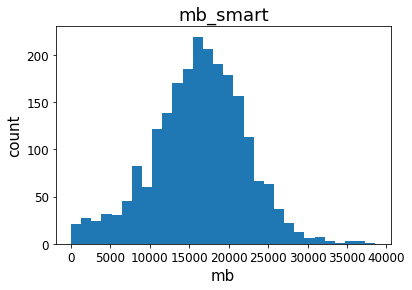

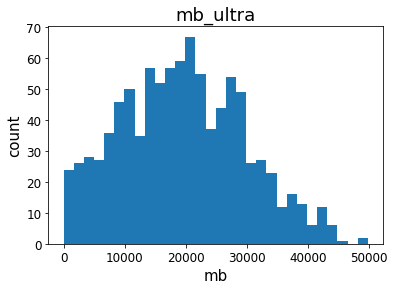

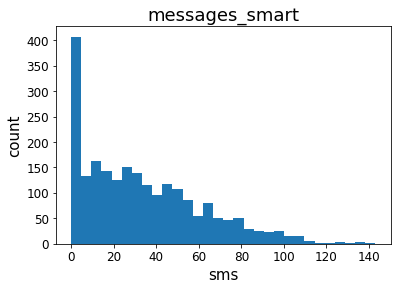

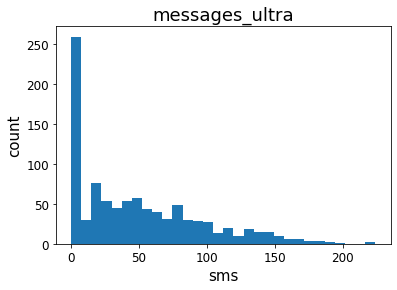

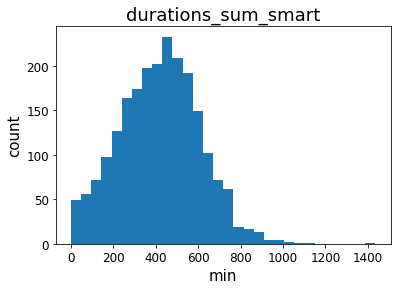

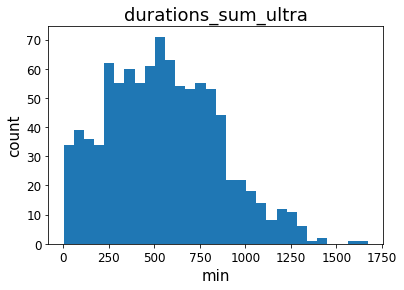

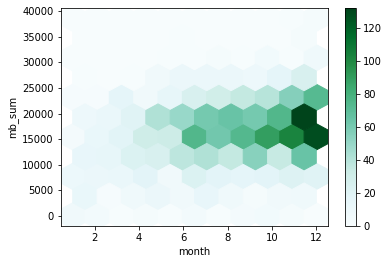

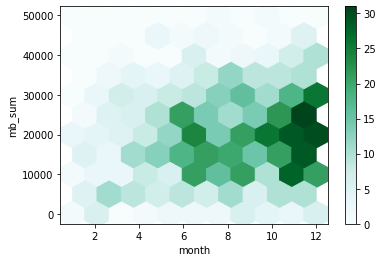

In [13]:
smart_data['mb_sum'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('mb_smart', fontsize=18)
plt.xlabel("mb", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

ultra_data['mb_sum'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('mb_ultra', fontsize=18)
plt.xlabel("mb", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

smart_data['messages_count'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('messages_smart', fontsize=18)
plt.xlabel("sms", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()
ultra_data['messages_count'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('messages_ultra', fontsize=18)
plt.xlabel("sms", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

montly_calls_smart['durations_sum'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('durations_sum_smart', fontsize=18)
plt.xlabel("min", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()
montly_calls_ultra['durations_sum'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.title('durations_sum_ultra', fontsize=18)
plt.xlabel("min", fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

smart_data.plot(x='month',y='mb_sum',kind='hexbin',gridsize=10,sharex=False)
plt.show()
ultra_data.plot(x='month',y='mb_sum',kind='hexbin',gridsize=10,sharex=False)
plt.show()

data_users_cities = users_data[['user_id', 'city']]
calculated_data = calculated_data.merge(data_users_cities, on='user_id', how='left')

## Выводы по графикам <br>

Первое на что хочется обратить внимание, так это на смс. На обоих тарифах большинство клиентов в месфц отправляют 0 смс
или совсем небольшое количество.<br>
Интересную особенность можно увидеть на завершающих двух графиках. Расход интернета увеличивается в диапазоне с августа<br>
по декабрь. Вероятно, сидят дома и смортрят видео по пандасу.<br>


In [16]:
calculated_data['revenue'] = calculated_data['revenue'].where(calculated_data['revenue']!= 0, calculated_data['mountly_fee'])
smart_data_profit['revenue'] = smart_data_profit['revenue'].where(smart_data_profit['revenue']!= 0, smart_data_profit['mountly_fee'])
ultra_data_profit['revenue'] = ultra_data_profit['revenue'].where(ultra_data_profit['revenue']!= 0, ultra_data_profit['mountly_fee'])

ultra_data_profit['revenue'].mean()
smart_data_profit['revenue'].mean()

def loc_group(data):
    if data['city'] == "Москва":
        return 'Москва'
    else:
        return 'Другое'
calculated_data['location_groups'] = calculated_data.apply(loc_group, axis = 1)


revenue_compare_location = calculated_data.pivot_table(index=[
    'location_groups'],columns='tariff', values = 'revenue', aggfunc = 'mean')
revenue_compare_location['avg'] = [1447.492181, 1421.168852]

revenue_compare_tariff = calculated_data.pivot_table(columns='tariff', values = 'revenue', aggfunc = 'mean')

avg_revenue = calculated_data['revenue'].mean()

print(revenue_compare_tariff)
revenue_compare_location



tariff         smart        ultra
revenue  1192.232328  2029.197466


,index,user_id,month,add_pay,mountly_fee,add_payment_for_gb,add_payment_for_sms,revenue
0,0,1000,5,0.0,1950,0.0,0.0,1950.0
1,1,1000,6,0.0,1950,0.0,0.0,1950.0
2,2,1000,7,0.0,1950,0.0,0.0,1950.0
3,3,1000,8,0.0,1950,0.0,0.0,1950.0
4,4,1000,9,0.0,1950,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...
942,3140,1495,8,0.0,1950,0.0,0.0,1950.0
943,3141,1495,9,0.0,1950,450.0,0.0,2400.0
944,3142,1495,10,0.0,1950,0.0,0.0,1950.0
945,3143,1495,11,0.0,1950,1350.0,0.0,3300.0


## Анализ выручки

Средняя выручка по пользователям тарифа ultra: 2029.1974656810983<br>
Средняя выручка по пользователям тарифа smart: 1192.232327780279<br>
<br>
Средняя выручка по пользователям из Москвы: 1421.1688524590163<br>
Средняя выручка по пользователям из Москвы с тарифом ultra: 2075.8928571428573<br>
Средняя выручка по пользователям из Москвы с тарифом smart: 1421.1688524590163<br>
<br>
Средняя выручка по пользователям не из Москвы: 1447.492181<br>
Средняя выручка по пользователям не из Москвы с тарифом ultra: 2014.7302904564315<br>
Средняя выручка по пользователям не из Москвы с тарифом smart: 1223.997275<br>




## Этап 4: Проверка гипотез

In [28]:
from scipy import stats as st

avg_revenue #среднее генеральной совокупности по выручке
ava_rev_ultra = 2029
other_cities = calculated_data.query('location_groups == "Другое"')
msc_cities = calculated_data.query('location_groups == "Москва"')
    
###Проверка равенства средних двух совокупностей
alpha = .05 # критический уровень статистической значимости


print('Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов')

results2 = st.ttest_ind(
    other_cities['revenue'], 
    msc_cities['revenue'], equal_var = True )

print('p-значение:', results2.pvalue) 

if (results2.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
     
print('Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается')


avg_ultra_profit = 2029

results2 = st.ttest_ind(
    smart_data_profit['revenue'], 
    ultra_data_profit['revenue'], equal_var = True)

print('p-значение:', results2.pvalue) 

if (results2.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
p-значение: 0.4626009261649693
Не получилось отвергнуть нулевую гипотезу
Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
p-значение: 5.690167441750782e-184
Отвергаем нулевую гипотезу


2029.1974656810983

## Выводы по гипотезам: <br>
Сформулироваk нулевую гипозиту так: <br>
1) средняя выручка абонентов из Москвы равна средней выручке абонентов из других населённых пунктов. <br>
2) средние выручка на тарифе Ультра равна средней выручке на тарифе Смарт. <br>

Выводы по ним: <br>
1) Первую гипотезу не получилось отвергнуть.Разница между средней выручкой москвичей и клиентов, проживающих за пределами столицы невелика. <br>
2) Вторгую гипотезу получилось отвергнуть. Выручка по тарифам Ультра и Смарт различаются существено. Амазон прав - за подпиской (абонентской платой) настоящее и будущее.<br>
В качестве критерия оценки использовался Критерии согласия.<br>
<br>
